# Part 1: Histogram Equalization

In [3]:
import cv2
import matplotlib.pyplot as plt

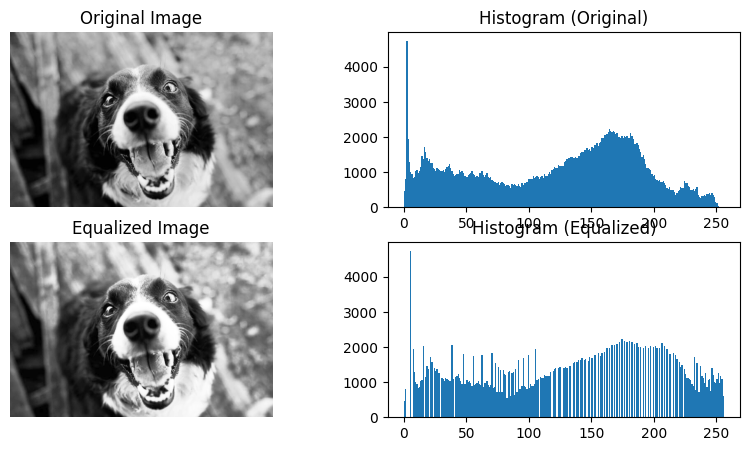

In [4]:
image = cv2.imread('first.jpg', cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(10,5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(image.ravel(), 256, [0,256])
plt.title('Histogram (Original)')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), 256, [0,256])
plt.title('Histogram (Equalized)')

plt.show()

# Part 2: Histogram Equalization on Color Images

In [5]:
import cv2
import matplotlib.pyplot as plt

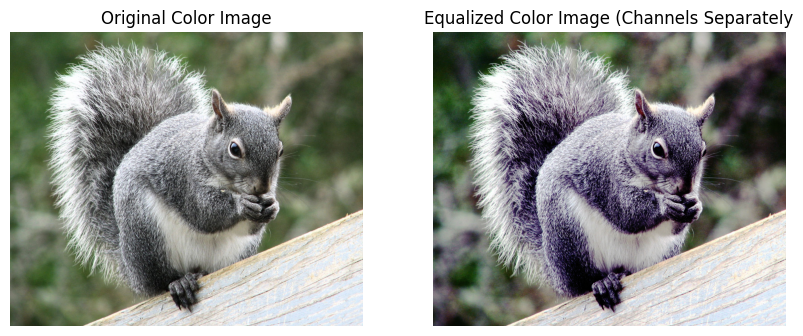

In [7]:
color_image = cv2.imread('second.jpg')
(b, g, r) = cv2.split(color_image)

equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

equalized_color_image = cv2.merge([equalized_b, equalized_g, equalized_r])

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Color Image (Channels Separately')
plt.axis('off')

plt.show()

# Part 3: Histogram Matching (Specification)

In [8]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

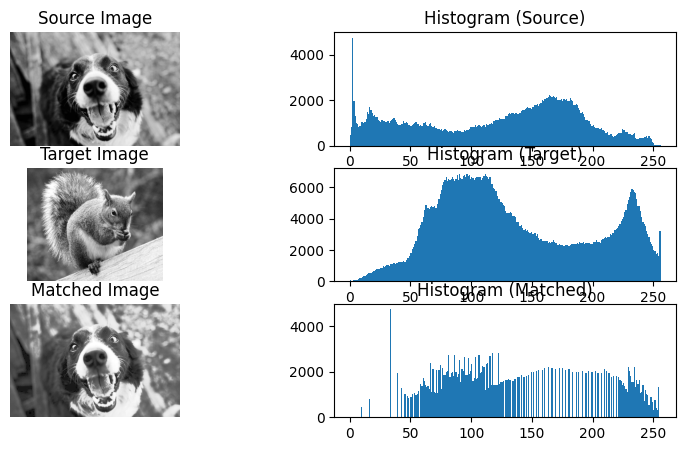

In [10]:
image_source = cv2.imread('first.jpg', cv2.IMREAD_GRAYSCALE)
image_target = cv2.imread('second.jpg', cv2.IMREAD_GRAYSCALE)

matched_image = exposure.match_histograms(image_source, image_target)

plt.figure(figsize=(15,5))

plt.subplot(3, 3, 1)
plt.imshow(image_source, cmap='gray')
plt.title('Source Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.hist(image_source.ravel(), 256, [0,256])
plt.title('Histogram (Source)')

plt.subplot(3, 3, 4)
plt.imshow(image_target, cmap='gray')
plt.title('Target Image')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.hist(image_target.ravel(), 256, [0,256])
plt.title('Histogram (Target)')

plt.subplot(3, 3, 7)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.hist(matched_image.ravel(), 256, [0,256])
plt.title('Histogram (Matched)')

plt.show()

# Part 4: Combining Histogram Equalization and Matching

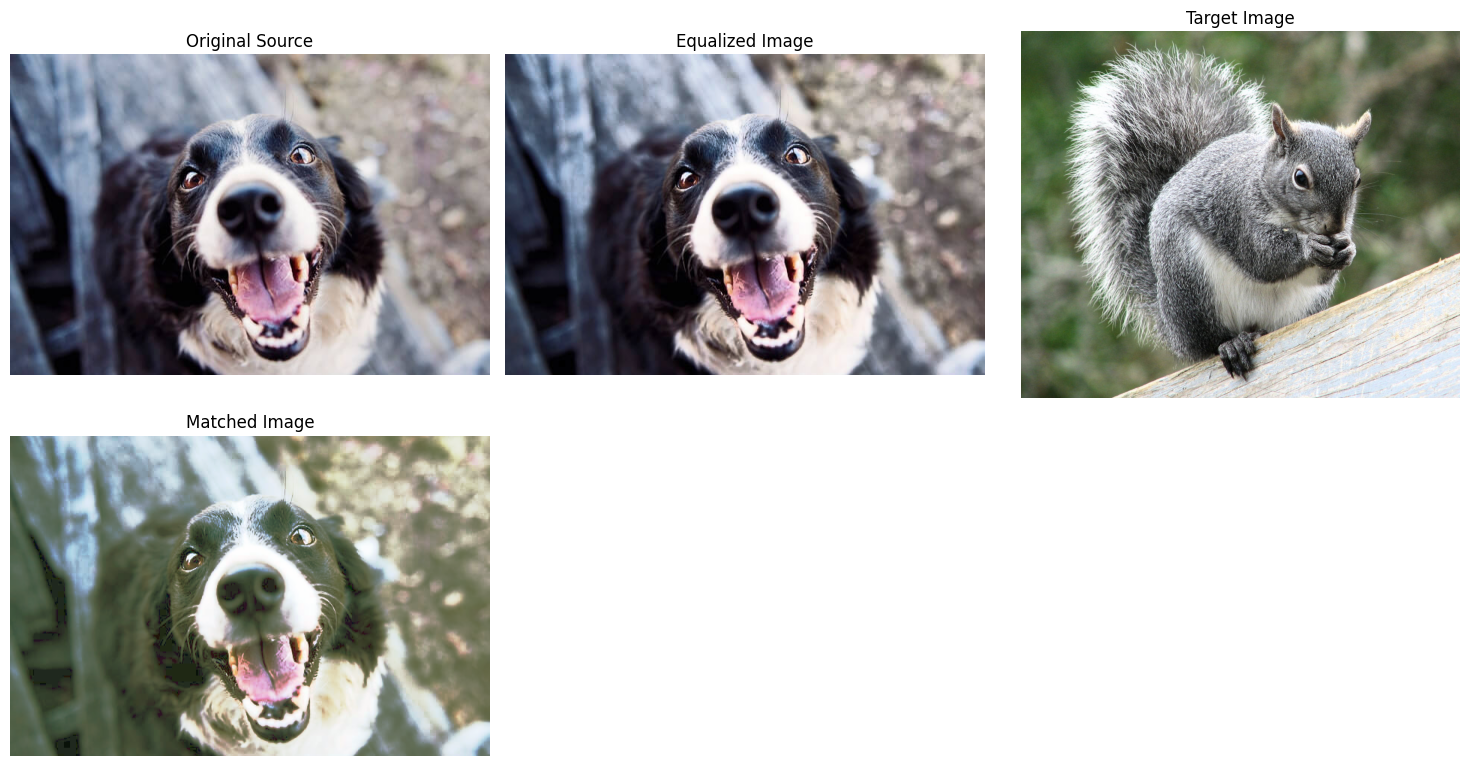

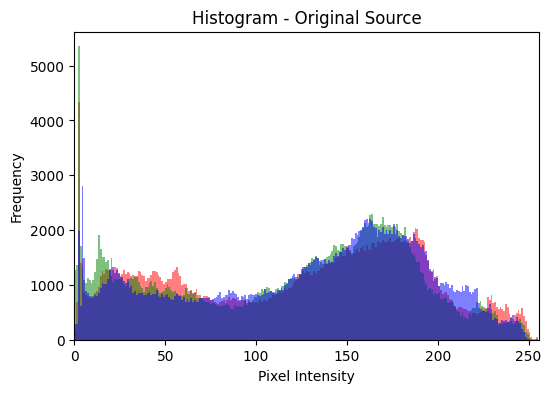

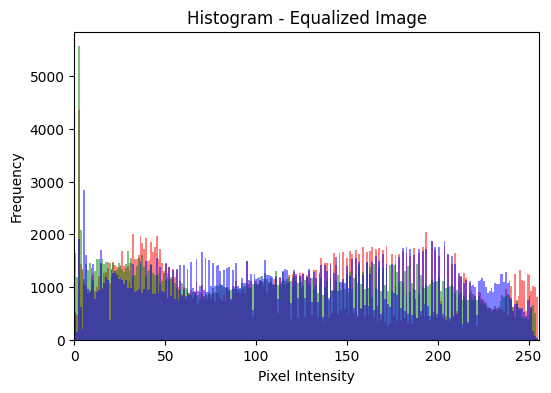

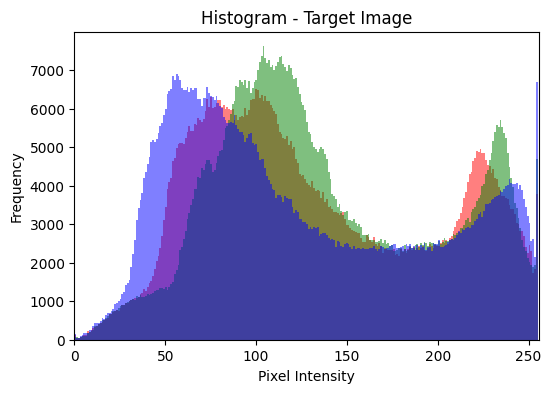

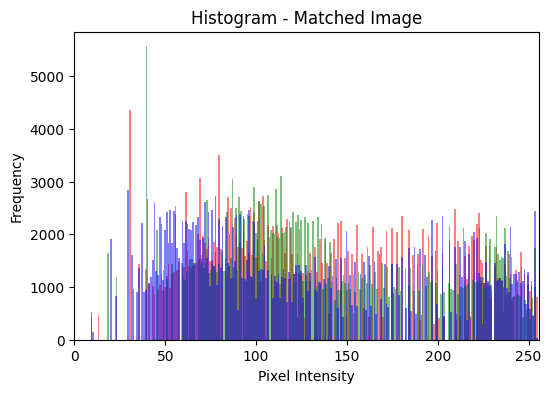

Processing Completed Successfully!


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

source_path = "first.jpg"
target_path = "second.jpg"

source = cv2.imread(source_path)
target = cv2.imread(target_path)

source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

def equalize_color_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    v_eq = cv2.equalizeHist(v)

    hsv_eq = cv2.merge([h, s, v_eq])
    img_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

    return img_eq

equalized = equalize_color_image(source)
matched = exposure.match_histograms(equalized, target, channel_axis=-1)

matched = np.clip(matched, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(source)
plt.title("Original Source")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(equalized)
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(target)
plt.title("Target Image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(matched)
plt.title("Matched Image")
plt.axis("off")

plt.tight_layout()
plt.show()

def plot_histogram(image, title):
    plt.figure(figsize=(6,4))
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        plt.hist(image[:, :, i].ravel(), bins=256, color=col, alpha=0.5)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])
    plt.show()

plot_histogram(source, "Histogram - Original Source")
plot_histogram(equalized, "Histogram - Equalized Image")
plot_histogram(target, "Histogram - Target Image")
plot_histogram(matched, "Histogram - Matched Image")

print("Processing Completed Successfully!")